In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [3]:
fake = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")
true = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")

In [4]:
fake.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake["subject"].value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

In [ ]:
true["subject"].value_counts()

In [7]:
fake["category"] = 1
true["category"] = 0

In [8]:
df = pd.concat([fake,true]).reset_index(drop=True)

In [10]:
df.tail()

,title,text,subject,date,category
42829,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
42830,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
42831,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
42832,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
42833,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


In [13]:
df.category

0        1
1        1
2        1
3        1
4        1
        ..
42829    0
42830    0
42831    0
42832    0
42833    0
Name: category, Length: 42834, dtype: int64

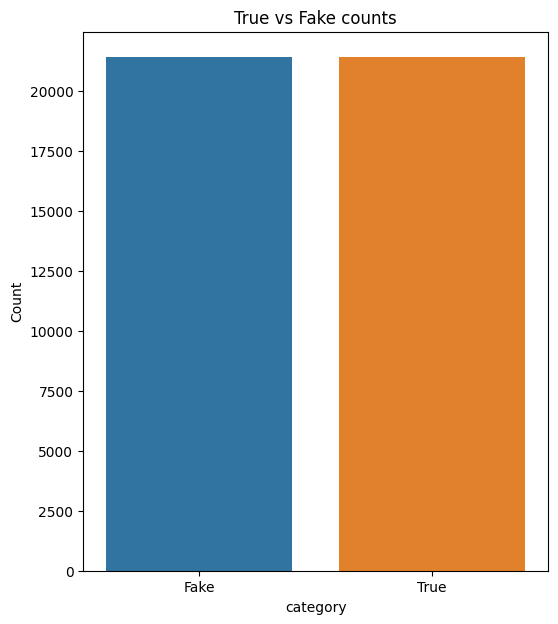

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

df2 = df.copy()
df2['category'] = df2['category'].map({0: 'True', 1: 'Fake'})

plt.figure(figsize=(6,7))
ax = sns.countplot(x='category', data=df2)
ax.set_ylabel('Count')
ax.set_title('True vs Fake counts')
plt.show()


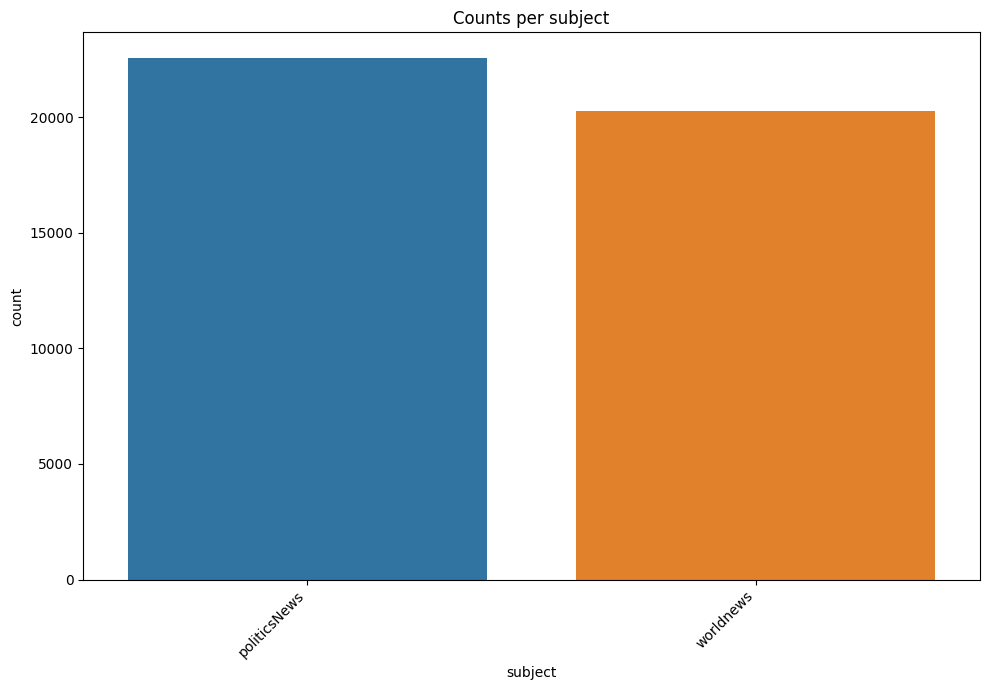

In [16]:
plt.figure(figsize=(10,7))
sns.countplot(x='subject', data=df)         # pass column name + data
plt.xticks(rotation=45, ha='right')         # rotate if labels overlap
plt.title('Counts per subject')
plt.tight_layout()
plt.show()


In [18]:
df = df[["text","category"]]

In [19]:
df.head()

,text,category
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [20]:
df.tail()

,text,category
42829,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0
42830,"LONDON (Reuters) - LexisNexis, a provider of l...",0
42831,MINSK (Reuters) - In the shadow of disused Sov...,0
42832,MOSCOW (Reuters) - Vatican Secretary of State ...,0
42833,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,0


In [24]:
len(df.isna().sum())

2

In [25]:
df.isna().sum()*100/len(df)

text        0.0
category    0.0
dtype: float64